In [3]:
from modelscope import snapshot_download
model_name= "mirror013/speaker-diarization-3.1"
model_dir = snapshot_download(model_name)

# from transformers import AutoModelForCausalLM,AutoTokenizer
# from huggingface_hub import login

# login(token="")

# # model_name= "pyannote/speaker-diarization-3.1"
# # cache_dir="model/pyannote/speaker-diarization-3.1"
# # AutoModelForCausalLM.from_pretrained(model_name,cache_dir=cache_dir)
# segmentation_model_name="pyannote/segmentation-3.0"
# segmentation_cache_dir="model/pyannote/segmentation-3.0"
# AutoModelForCausalLM.from_pretrained(segmentation_model_name,cache_dir=segmentation_cache_dir)

# from pyannote.audio import Model
# model = Model.from_pretrained(
#   "pyannote/segmentation-3.0", 
#   use_auth_token="")


2025-03-20 11:51:57,053 - modelscope - INFO - Creating symbolic link [C:\Users\ldz11\.cache\modelscope\hub\models\mirror013\speaker-diarization-3.1].
2025-03-20 11:51:57,056 - modelscope - WARNING - Failed to create symbolic link C:\Users\ldz11\.cache\modelscope\hub\models\mirror013\speaker-diarization-3.1 for C:\Users\ldz11\.cache\modelscope\hub\models\mirror013\speaker-diarization-3.1\mirror013\speaker-diarization-3___1.


INFO:speechbrain.utils.quirks:Applied quirks (see `speechbrain.utils.quirks`): [disable_jit_profiling, allow_tf32]
INFO:speechbrain.utils.quirks:Excluded quirks specified by the `SB_DISABLE_QUIRKS` environment (comma-separated list): []
D:\Program Files\miniconda\lib\inspect.py:869: UserWarning: Module 'speechbrain.pretrained' was deprecated, redirecting to 'speechbrain.inference'. Please update your script. This is a change from SpeechBrain 1.0. See: https://github.com/speechbrain/speechbrain/releases/tag/v1.0.0
  if ismodule(module) and hasattr(module, '__file__'):


pytorch_model.bin:   0%|          | 0.00/26.6M [00:00<?, ?B/s]

D:\Program Files\miniconda\lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ldz11\.cache\torch\pyannote\models--pyannote--wespeaker-voxceleb-resnet34-LM. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.yaml:   0%|          | 0.00/221 [00:00<?, ?B/s]

D:\Program Files\miniconda\lib\site-packages\pyannote\audio\models\blocks\pooling.py:104: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\ReduceOps.cpp:1823.)
  std = sequences.std(dim=-1, correction=1)


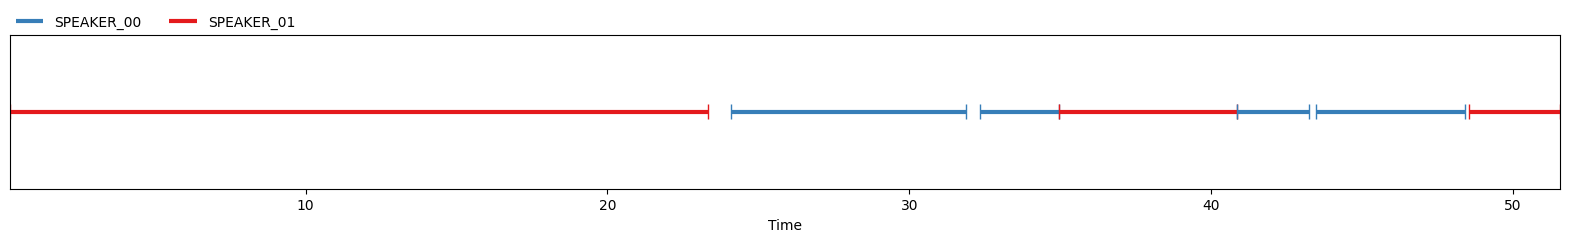

In [4]:
# from modelscope import AutoModelForCausalLM

# model = AutoModelForCausalLM.from_pretrained(model_name,
#                                              torch_dtype="auto",
#                                              device_map="auto"
#                                             )
from pyannote.audio import Pipeline
pipeline = Pipeline.from_pretrained(
  "pyannote/speaker-diarization-3.1",
  use_auth_token="")

# run the pipeline on an audio file
diarization = pipeline("2speakers_example.wav")
diarization

In [14]:
labels = diarization.labels()
print(labels)

for segment,track in diarization.itertracks():
    print(f'{segment.start:.1f}:{segment.end:.1f}')

['SPEAKER_00', 'SPEAKER_01']
0.2:23.3
24.1:31.9
32.3:35.0
35.0:40.9
40.9:43.2
43.5:48.4
48.5:51.6


In [15]:
# 剪辑wav片段
def extract_audio_segment(input_wav, output_wav, start_time, end_time):
    """
    从 WAV 文件中截取某一段音频并保存为新的 WAV 文件。

    参数:
    input_wav (str): 输入的 WAV 文件路径。
    output_wav (str): 输出的截取后的 WAV 文件路径。
    start_time (float): 截取的起始时间，以秒为单位。
    end_time (float): 截取的结束时间，以秒为单位。
    """
    try:
        (
            ffmpeg
            .input(input_wav, ss=start_time, to=end_time)
            .output(output_wav)
            .run(overwrite_output=True)
        )
        print(f"截取的音频已保存到 {output_wav}")
    except ffmpeg.Error as e:
        print(f"Error: {e.stderr.decode()}")

In [ ]:
# from modelscope.pipelines import pipeline
# sd_pipeline = pipeline(
#     task='speaker-diarization',
#     model=model
# )
# sd_result = pipeline("2speakers_example.wav")
# sd_result

In [ ]:
# API_URL="https://api-inference.huggingface.co/models/${模型名}"

# API_TOKEN=""

# headers={"Authorization":f"Bearer {API_TOKEN}"}

# import requests
# response = requests.post(API_URL,json={"inputs":"讲个笑话"})



In [ ]:
# from transformers import AutoModelForCausalLM,AutoTokenizer

# cache_dir="model/"+model_name
# AutoModelForCausalLM.from_pretrained(model_nameel,cache_dir=cache_dir)
# AutoTokenizer.from_pretrained(model_nameel,cache_dir=cache_dir)


# //gpt2-chinese
# model_dir=r'D:\'